In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = r'images/colorful.jpg'

## 2.1


 Mode 1: Color Image
Array Shape: (637, 640, 3)
Data Type: uint8
Number of Pixels: 1223040
BGR values of pixel (50, 100): [222 200 142]
Blue channel value: 222

 Mode 2: Grayscale Image
Array Shape: (637, 640)
Data Type: uint8
Intensity value of pixel (50, 100): 185


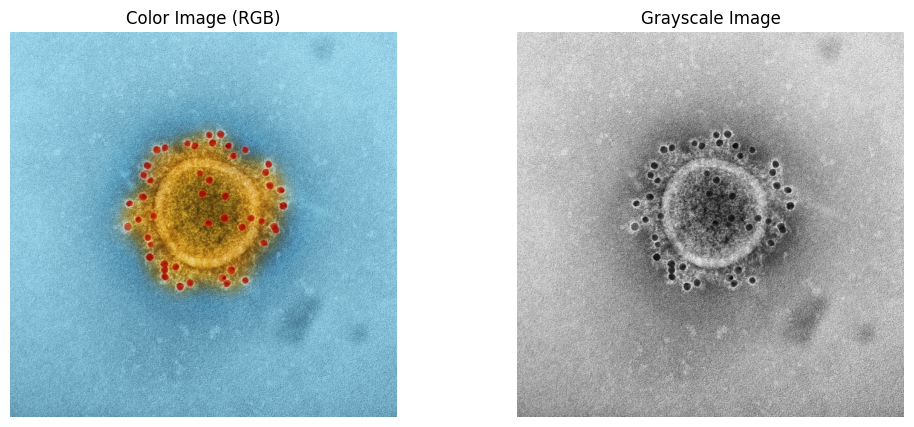

In [4]:
img_color = cv2.imread(image, cv2.IMREAD_COLOR)

print("\n Mode 1: Color Image")
print(f"Array Shape: {img_color.shape}")
print(f"Data Type: {img_color.dtype}")
print(f"Number of Pixels: {img_color.size}")

# Accessing pixel data: (height, width, color channel)
height, width, channels = img_color.shape

# Read the BGR values of a specific pixel (row 50, column 100)
pixel_bgr = img_color[50, 100]
print(f"BGR values of pixel (50, 100): {pixel_bgr}")

# Read a specific color channel (e.g., the Blue channel)
blue_value = img_color[50, 100, 0] # 0 is for the Blue channel
print(f"Blue channel value: {blue_value}")


# Load as a grayscale image
# cv2.IMREAD_GRAYSCALE.
img_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

print("\n Mode 2: Grayscale Image")
print(f"Array Shape: {img_gray.shape}")
print(f"Data Type: {img_gray.dtype}")

# Accessing pixel data: (height, width) - single channel
height_g, width_g = img_gray.shape

# Read the intensity value of a specific pixel
pixel_intensity = img_gray[50, 100]
print(f"Intensity value of pixel (50, 100): {pixel_intensity}")

# OpenCV uses BGR, but Matplotlib uses RGB. We must convert for correct illustration.
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Color Image (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray') # cmap='gray' is required for correct grayscale display
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

## 2.2

#### Differences in Coordinate Systems and Axes

- OpenCV and NumPy: The origin (0, 0) is in the top-left corner of the image. The y-axis increases downwards, and the x-axis increases to the right.
- Matplotlib: The origin in the bottom-left corner. The y-axis increases upwards, and the x-axis increases to the right.
- *differences in channel orders are explained in the report*

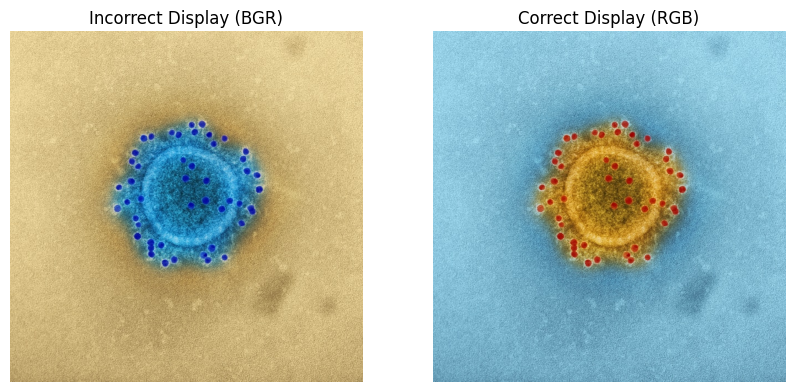

In [4]:
img_bgr = cv2.imread(image)

# 1. Incorrect display with Matplotlib, Passing the BGR image directly to Matplotlib.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_bgr)
plt.title('Incorrect Display (BGR)')
plt.axis('off')

# 2. Correct display with Matplotlib: convert the channel order from BGR to RGB.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('Correct Display (RGB)')
plt.axis('off')

plt.show()
    
# cv2.imshow('Correct Display with OpenCV (BGR)', img_bgr) :It will be displayed out of pycharm platform
# cv2.imshow() is a blocking call and requires cv2.waitKey() to work.

## 2.3

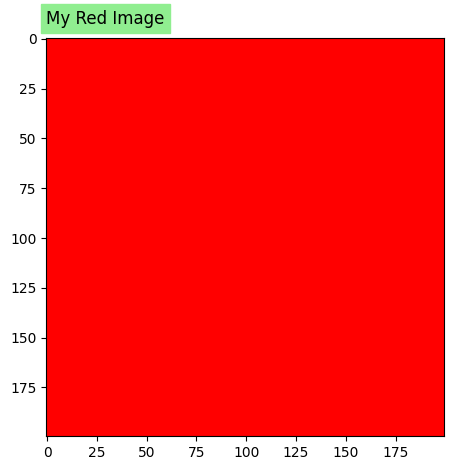

In [13]:
def display_image(image_array, title, title_bg_color='lightblue', show_axes=False, title_loc='center'):

    fig, ax = plt.subplots()
    
    # For color images (3D arrays), Matplotlib expects RGB format; though, OpenCV reads images as BGR by default, so we need to convert.
    if len(image_array.shape) == 3:
        image_to_show = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    else:
        # For grayscale images (2D arrays), no conversion is needed.
        image_to_show = image_array
        
    ax.imshow(image_to_show)

    # Set the title with a background color.
    ax.set_title(title, backgroundcolor=title_bg_color, pad=10, loc=title_loc)
    # Adds 10 points of space vertically between the bottom of the title text and the top border of the plot area

    # Adjust axes visibility based on the parameter.
    if not show_axes:
        ax.set_xticks([])
        ax.set_yticks([])
        
    
    # Adjust layout to prevent title from being thrown out of the frame
    plt.tight_layout()

    plt.show()


# A 3D array for a color image (height, width, channels).
# a 200x200 red image.
arbitrary_image = np.zeros((200, 200, 3), dtype=np.uint8)
# Set the blue and green channels to 0, and red to 255.
arbitrary_image[:, :, 2] = 255  # Red channel in BGR is the third channel (index 2)

display_image(arbitrary_image, "My Red Image", title_bg_color='lightgreen', show_axes=True, title_loc='left')

## 2.4

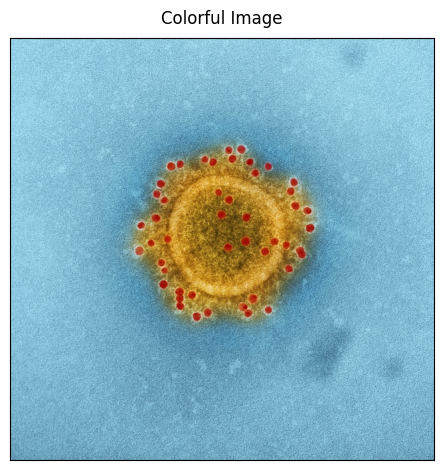

In [15]:
def standard_plot(img, title='Standard Image Plot', show_axes=False):

    sample_image = cv2.imread(img)
    # Check if the image is 2D (grayscale/single-channel) or 3D (color).
    is_grayscale = len(sample_image.shape) == 2
    
    # 1. Determine vmin, vmax, and cmap based on the image properties
    vmin, vmax, cmap = None, None, None
    image_to_show = sample_image
    
    if is_grayscale:
        cmap = 'gray'
        
        # Check data type to set standard min/max display values
        if sample_image.dtype == np.uint8:
            vmin, vmax = 0, 255
        elif sample_image.dtype == np.uint16:
            vmin, vmax = 0, 65535
        elif sample_image.dtype.kind in 'f': # Floating point types (e.g., float32, float64)
            # Standard practice for float images is to scale between 0.0 and 1.0
            vmin, vmax = 0.0, 1.0
        else:
            # use actual min/max of the data
            vmin, vmax = sample_image.min(), sample_image.max()
        
    else:
        # conversion
        image_to_show = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)


    fig, ax = plt.subplots()

    ax.imshow(image_to_show, cmap=cmap, vmin=vmin, vmax=vmax)

    ax.set_title(title, pad=10)

    if not show_axes:
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()


standard_plot(img=image, title="Colorful Image", show_axes=False)

## 3.1

In [ ]:
def create_chessboard(width, height, num_squares):
    """
    Creates a simple black and white chessboard image.

    Args:
        width (int): The total width of the output image in pixels.
        height (int): The total height of the output image in pixels.
        num_squares (int): The number of squares (cells) along one dimension (e.g., 8 for an 8x8 board).

    Returns:
        np.ndarray: A 2D NumPy array representing the grayscale chessboard image (0=black, 255=white).
    """
    
    # 1. Calculate the size of each individual square (cell)
    # The cell size must be an integer, so we use floor division.
    cell_width = width // num_squares
    cell_height = height // num_squares
    
    # Initialize the entire image as a black canvas (value 0 for black)
    # Use np.uint8 data type for standard image intensity (0-255 range)
    chessboard = np.zeros((height, width), dtype=np.uint8)
    
    # 2. Iterate through rows and columns of squares
    for i in range(num_squares): # Row index of the square
        for j in range(num_squares): # Column index of the square
            
            # Determine the color of the current square:
            # Squares where (i + j) is even are usually white (value 255).
            # Squares where (i + j) is odd are usually black (value 0, already set by default).
            if (i + j) % 2 == 0:
                color = 255  # White
            else:
                color = 0    # Black (already the default, but set for clarity)

            # 3. Calculate pixel coordinates for the current square
            y_start = i * cell_height
            y_end = y_start + cell_height
            x_start = j * cell_width
            x_end = x_start + cell_width
            
            # 4. Set the pixel values for this square in the image array
            # Ensure slicing doesn't exceed the actual width/height if division was not perfect
            chessboard[y_start:min(y_end, height), x_start:min(x_end, width)] = color
            
    return chessboard


# Define the image parameters
IMAGE_WIDTH = 400
IMAGE_HEIGHT = 400
SQUARES = 8 # Creates an 8x8 chessboard

# 1. Generate the chessboard image
chessboard_image = create_chessboard(IMAGE_WIDTH, IMAGE_HEIGHT, SQUARES)

# 2. Save the output image with the required filename using OpenCV (cv2.imwrite)
OUTPUT_FILENAME = "image_1.jpg"
cv2.imwrite(OUTPUT_FILENAME, chessboard_image)

print(f"Chessboard image created and saved successfully as '{OUTPUT_FILENAME}' (Resolution: {IMAGE_HEIGHT}x{IMAGE_WIDTH}, Cells: {SQUARES}x{SQUARES}).")

# Optionally display the image using Matplotlib for verification
plt.figure(figsize=(4, 4))
plt.imshow(chessboard_image, cmap='gray', vmin=0, vmax=255)
plt.title(f"Generated {SQUARES}x{SQUARES} Chessboard")
plt.xticks([])
plt.yticks([])
plt.show()

## 3.2

## 3.3

## 3.4